In [1]:
import pandas as pd
data = pd.read_csv('分类.csv',encoding = 'gbk')
data.head()

年龄     基金资产比  客户价值等级  资产负债率       基金金额    预测需求  level
0  51  0.357611       5    0.0  247635.98 -202719      0
1  40  0.059695       4    0.0   11097.96    -218      0
2  49  0.380197       6    0.0  500332.84  229196      1
3  39  0.961276       4    0.0  308277.39  170458      1
4  51  0.944988       4    0.0  452859.42  249117      1

In [2]:
X, y = data[['年龄','基金资产比','客户价值等级','资产负债率',"基金金额",'预测需求']].values, data['level'].values
print('Features:',X[:10], '\nLabels:', y[:10], sep='\n')

Features:
[[ 5.10000000e+01  3.57611465e-01  5.00000000e+00  0.00000000e+00
   2.47635980e+05 -2.02719000e+05]
 [ 4.00000000e+01  5.96945720e-02  4.00000000e+00  0.00000000e+00
   1.10979600e+04 -2.18000000e+02]
 [ 4.90000000e+01  3.80196646e-01  6.00000000e+00  0.00000000e+00
   5.00332840e+05  2.29196000e+05]
 [ 3.90000000e+01  9.61276248e-01  4.00000000e+00  0.00000000e+00
   3.08277390e+05  1.70458000e+05]
 [ 5.10000000e+01  9.44987927e-01  4.00000000e+00  0.00000000e+00
   4.52859420e+05  2.49117000e+05]
 [ 5.90000000e+01  9.68335791e-01  3.00000000e+00  0.00000000e+00
   4.62993200e+04  2.68660000e+04]
 [ 6.40000000e+01  9.86032927e-01  3.00000000e+00  0.00000000e+00
   5.25396700e+04  3.07040000e+04]
 [ 6.40000000e+01  9.79392708e-01  3.00000000e+00  0.00000000e+00
   6.06899300e+04  3.26120000e+04]
 [ 5.70000000e+01  9.99026361e-01  3.00000000e+00  0.00000000e+00
   2.68831600e+04  1.50850000e+04]
 [ 3.20000000e+01  8.53937304e-01  2.00000000e+00  0.00000000e+00
   5.75295000e+

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)
print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 3014 rows
Test Set: 1293 rows


In [4]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_train, y_train)
print (model)

LinearRegression()


In [5]:
import numpy as np

predictions = model.predict(X_test)
np.set_printoptions(suppress=True)
print('Predicted labels: ', np.round(predictions)[:10])
print('Actual labels   : ' ,y_test[:10])

Predicted labels:  [-0.  0. -0. -0. -0. -0. -0.  0.  1.  1.]
Actual labels   :  [0 0 0 0 0 0 0 0 1 1]


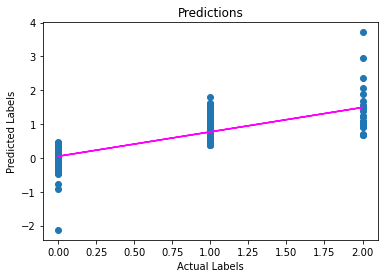

In [6]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [89]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, predictions)
print("R2:", r2)

MSE: 0.04275398320992328
RMSE: 0.2067703634709851
R2: 0.6795274207517619
